PATH CALCULATOR

In [4]:

import numpy as np
import scipy
ini=np.array([1,1,1])
f=np.array([3,3,3])
tf=5
ax0=ini[0]
ay0=ini[1]
az0=ini[2]
ax1=0
ay1=0
az1=0

#X=np.array([ax2,ax3,ay2,ay3,az2,az3])
A=np.array([[tf**2,tf**3,0,0,0,0],[0,0,tf**2,tf**3,0,0],[0,0,0,0,tf**2,tf**3],[2*tf,3*tf**2,0,0,0,0],[0,0,2*tf,3*tf**2,0,0],[0,0,0,0,2*tf,3*tf**2]])
K=np.array([f[0],f[1],f[2],0,0,0])
invA=np.linalg.inv(A)
X=invA@K
print(X);
ax2=X[0]
ax3=X[1]
ay2=X[2]
ay3=X[3]
az2=X[4]
az3=X[5]
Aa=np.array([[ax0,ax1,ax2,ax3],[ay0,ay1,ay2,ay3],[az0,az1,az2,az3]])
arr = np.array([[1,2,3],[4,5,6]])

#PATH calculator
def pathfunc(tf,Aa,arr):
  t=0
  for t in range (tf+1):
    T=np.array([1,t,t**2,t**3])
    print(t)
    
    row=Aa@T
    print(row)
    arr = np.vstack([arr,row])

  return arr

arr = np.array([[0,0,0]])
arr1 =pathfunc(tf,Aa,arr) #here we get all the points of trajectory
print(arr1)

#inverse kinematics

def invkine(arr1,J):
  for i in range(len(arr1)):
    x=[0]*3;
    x=arr1[i];
    d1=1;
    d2=3;
    d3=1;
    k=x[0]**2+x[1]**2
    r = abs((k+(x[2]-d1)**2-d2**2-d3**2)/(2*d2*d3))
    theta1 = np.arctan(x[1]/x[0])
    theta3 = np.arctan(np.sqrt(abs(1-r**2))/r)
    theta2 = np.arctan(x[1]/x[0]) - np.arctan((d3*np.sin(theta3))/(d2+d3*np.cos(theta3)))
    
    s=np.array([theta1,theta2,theta3])
    J=np.vstack([J,s])
  return J

    
J=np.array([[0,0,0]])
arr2=invkine(arr1,J) #here we get all the JOINT VAR of trajectory
print(arr2)


[ 0.36  -0.048  0.36  -0.048  0.36  -0.048]
0
[1. 1. 1.]
1
[1.312 1.312 1.312]
2
[2.056 2.056 2.056]
3
[2.944 2.944 2.944]
4
[3.688 3.688 3.688]
5
[4. 4. 4.]
[[0.    0.    0.   ]
 [1.    1.    1.   ]
 [1.312 1.312 1.312]
 [2.056 2.056 2.056]
 [2.944 2.944 2.944]
 [3.688 3.688 3.688]
 [4.    4.    4.   ]]
[[0.         0.         0.        ]
 [       nan        nan 0.64052231]
 [0.78539816 0.6424904  0.5843739 ]
 [0.78539816 0.69737777 0.35489743]
 [0.78539816 0.47143193 1.49896925]
 [0.78539816 0.61599829 0.69967714]
 [0.78539816 0.60033736 0.76984433]
 [0.78539816 0.59901417 0.77585358]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


JC AND JW CALCULATOR

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1



sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2 l3')
k1=sym.Matrix([q1,q2,q3])
k2=sym.Matrix([q1dot,q2dot,q3dot])
k3=sym.Matrix([q1ddot,q2ddot,q3ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])
M=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);
A1=sym.Matrix([[sym.cos(q1),-sym.sin(q1),0,0],[sym.sin(q1),sym.cos(q1),0,0],[0,0,1,l1],[0,0,0,1]]);

A2=sym.Matrix([[sym.cos(q2),0,-sym.sin(q2),0],[sym.sin(q2),0,sym.cos(q2),0],[0,-1,0,l2],[0,0,0,1]]);
A3=sym.Matrix([[sym.cos(q3),-sym.sin(q3),0,l3*sym.cos(q1)],[sym.sin(q3),sym.cos(q3),0,l3*sym.sin(q3)],[0,0,1,0],[0,0,0,1]]);



sym.simplify(A1*A2*A3)

⎡cos(q₃)⋅cos(q₁ + q₂)  -sin(q₃)⋅cos(q₁ + q₂)  -sin(q₁ + q₂)  l₃⋅cos(q₁)⋅cos(q₁
⎢                                                                             
⎢sin(q₁ + q₂)⋅cos(q₃)  -sin(q₃)⋅sin(q₁ + q₂)  cos(q₁ + q₂)   l₃⋅sin(q₁ + q₂)⋅c
⎢                                                                             
⎢      -sin(q₃)              -cos(q₃)               0         l₁ + l₂ - l₃⋅sin
⎢                                                                             
⎣         0                      0                  0                   1     

 + q₂)⎤
      ⎥
os(q₁)⎥
      ⎥
(q₃)  ⎥
      ⎥
      ⎦

In [1]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1
l1=2
l2=2


sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot q3dot q1ddot q2ddot q3ddot T1 T2 F mG l1 l2 l3')
k1=sym.Matrix([q1,q2,q3])
k2=sym.Matrix([q1dot,q2dot,q3dot])
k3=sym.Matrix([q1ddot,q2ddot,q3ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])


Z0=sym.Matrix([[0],[0],[1]]);
Z1=sym.Matrix([[0],[0],[1]]);
Z2=sym.Matrix([[-sym.sin(q1+q2)],[sym.cos(q1+q2)],[0]]);
O3=sym.Matrix([[l3*sym.cos(q1)*sym.cos(q1+q2)],[l3*sym.cos(q1)*sym.sin(q1+q2)],[l1+l2-l3*sym.sin(q3)]])
O2=sym.Matrix([[0],[0],[l1+l2]])
O1=sym.Matrix([[0],[0],[l1]])
O0=sym.Matrix([[0],[0],[0]])

sym.simplify(Z0.cross(O3-O0)),sym.simplify(Z1.cross(O3-O1)),sym.simplify(Z2.cross(O3-O2))

⎛⎡-l₃⋅sin(q₁ + q₂)⋅cos(q₁)⎤  ⎡-l₃⋅sin(q₁ + q₂)⋅cos(q₁)⎤  ⎡-l₃⋅sin(q₃)⋅cos(q₁ +
⎜⎢                        ⎥  ⎢                        ⎥  ⎢                    
⎜⎢l₃⋅cos(q₁)⋅cos(q₁ + q₂) ⎥, ⎢l₃⋅cos(q₁)⋅cos(q₁ + q₂) ⎥, ⎢-l₃⋅sin(q₃)⋅sin(q₁ +
⎜⎢                        ⎥  ⎢                        ⎥  ⎢                    
⎝⎣           0            ⎦  ⎣           0            ⎦  ⎣      -l₃⋅cos(q₁)   

 q₂)⎤⎞
    ⎥⎟
 q₂)⎥⎟
    ⎥⎟
    ⎦⎠

Q1DDOT Q2DDOT Q3DDOT CALCULATOR

In [8]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1
l1=2
l2=2
l3=2
#I1+I2 I2
#I2 I2
i1=1
i2=1
i3=1
m1g=1
m2g=1
m3g=1
sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,T3,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot q3dot q1ddot q2ddot q3ddot T1 T2 T3 mG l1 l2 l3')
k1=sym.Matrix([q1,q2,q3])
k2=sym.Matrix([q1dot,q2dot,q3dot])
k3=sym.Matrix([q1ddot,q2ddot,q3ddot])
VQ=m1g*l1/2+m2g*(l1)+m2g*(l2/2)*sym.sin(q2)+m3g*(l1+l2+l3/2)*sym.sin(q3+q2)
X1=sym.diff(VQ,q1)
X2=sym.diff(VQ,q2)
X3=sym.diff(VQ,q3)
GQ=sym.Matrix([X1,X2,X3])
tau=sym.Matrix([T1,T2,T3])
M=sym.Matrix([[0,0,0],[0,0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[0,0,0],[0,0,0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l3*sym.sin(q1+q2)*sym.cos(q1),(l2-l3*sym.sin(q3))*sym.cos(q1+q2),-l3*sym.sin(q3)*cos(q1+q2)],[l3*sym.cos(q1+q2)*sym.cos(q1),(l2-l3*sym.sin(q3))*sym.sin(q1+q2),-l3*sym.sin(q3)*sin(q1+q2)],[0,-l3*sym.cos(q1),-l3*sym.cos(q1)]]);
Z=O.T
#FOR ROTATIONAL ENERGY CALCULATION
M1=sym.Matrix([[0,0,0],[0,0,0],[1,0,0]]);
X1=M1.T
N1=sym.Matrix([[0,-sym.sin(q1+q2),-sym.sin(q1+q2)],[0,sym.cos(q1+q2),sym.cos(q1+q2)],[1,0,0]]);
Y1=N1.T
O1=sym.Matrix([[0,-sym.sin(q1+q2),-sym.sin(q1+q2)],[0,sym.cos(q1+q2),sym.cos(q1+q2)],[1,0,0]]);
Z1=O1.T
I=sym.Matrix([[i1,0,0],[0,i2,0],[0,0,i3]])

DQ0=sym.simplify(X*M)+sym.simplify(Y*N)+sym.simplify(Z*O)
DQ1=(sym.simplify(X1*M1)+sym.simplify(Y1*N1)+sym.simplify(Z1*O1))*I
DQ=DQ0+DQ1
no1=3

CQQD= sym.Matrix([[0,0,0],[0,0,0],[0,0,0]])

#Cqqd CALCULATOR
for k in range(no1):
    for j in range(no1):
        su=0
        for i in range(no1):
            su+=(0.5*(sym.diff(DQ[k,j],k1[i]) + sym.diff(DQ[k,i],k1[j])-sym.diff(DQ[i,j],k1[k])))*k2[i]
            
        CQQD[k,j]=su
        
        

difF=sym.simplify(DQ.inv()*(CQQD*(k2)+GQ-tau))
difF

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢             ⎛    2    2         2    2         2    ⎞ ⎛                     
⎢           - ⎝- l₃ ⋅sin (q₁) + l₃ ⋅sin (q₃) + l₃  + 2⎠⋅⎝2.0⋅T₂ - 2.0⋅l₁⋅cos(q
⎢           ──────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢  ⎛         2                            2         

In [11]:
from sympy.printing.pycode import pycode
pycode(difF[2])

'(1/2)*(-(2*T3 + l3**2*q1dot*(q2dot + q3dot)*math.sin(2*q1) + l3**2*q3dot*(q1dot*math.sin(2*q1) - q3dot*math.sin(2*q3)) + l3*q2dot*(l3*q1dot*math.sin(2*q1) - 2*q2dot*(l2 - l3*math.sin(q3))*math.cos(q3)) - (2*l1 + 2*l2 + l3)*math.cos(q2 + q3))*(l2**2 - 2*l2*l3*math.sin(q3) - l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2) + (-l2*l3*math.sin(q3) - l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2)*(2.0*T2 - 2.0*l1*math.cos(q2 + q3) + 4.0*l2*l3*q2dot*q3dot*math.cos(q3) + 2.0*l2*l3*q3dot**2*math.cos(q3) - 1.0*l2*math.cos(q2) - 2.0*l2*math.cos(q2 + q3) + 2.0*l3**2*q1dot*q2dot*math.sin(2*q1) + 2.0*l3**2*q1dot*q3dot*math.sin(2*q1) - 2.0*l3**2*q2dot*q3dot*math.sin(2*q3) - 2.0*l3**2*q3dot**2*math.sin(2*q3) - 1.0*l3*math.cos(q2 + q3)))/(l2**2*(l3**2*math.cos(q1)**2 + 2))'

FINAL EQN SOLVER WITH PI IMPLEMENTATION

[0. 0. 0. 0. 0. 0.]
[1. 1. 1.]
[ 9.e+12 -6.e+18  9.e+12 -6.e+18  9.e+12 -6.e+18]
[1. 1. 1.]
[ 2.25e+10 -7.50e+14  2.25e+10 -7.50e+14  2.25e+10 -7.50e+14]
[1. 1. 1.]
[ 1.00000000e+10 -2.22222222e+14  1.00000000e+10 -2.22222222e+14
  1.00000000e+10 -2.22222222e+14]
[1. 1. 1.]
[ 1.406250e+09 -1.171875e+13  1.406250e+09 -1.171875e+13  1.406250e+09
 -1.171875e+13]
[1. 1. 1.]
[ 1.13906250e+09 -8.54296875e+12  1.13906250e+09 -8.54296875e+12
  1.13906250e+09 -8.54296875e+12]
[1. 1. 1.]
[ 9.e+08 -6.e+12  9.e+08 -6.e+12  9.e+08 -6.e+12]
[1. 1. 1.]
[ 9.e+08 -6.e+12  9.e+08 -6.e+12  9.e+08 -6.e+12]
[1. 1. 1.]
[ 1.00000000e+08 -2.22222222e+11  1.00000000e+08 -2.22222222e+11
  1.00000000e+08 -2.22222222e+11]
[1. 1. 1.]
[ 5.625e+07 -9.375e+10  5.625e+07 -9.375e+10  5.625e+07 -9.375e+10]
[1. 1. 1.]
[ 1.11111111e+07 -8.23045267e+09  1.11111111e+07 -8.23045267e+09
  1.11111111e+07 -8.23045267e+09]
[1. 1. 1.]
[ 9.20338341e+06 -6.20452814e+09  9.20338341e+06 -6.20452814e+09
  9.20338341e+06 -6.20452814e+0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in double_scalars



[3.24217127 3.24217127 3.24217127]
[ 4.0257051  -1.79494201  4.0257051  -1.79494201  4.0257051  -1.79494201]
[3.23076309 3.23076309 3.23076309]
[ 4.0257051  -1.79494201  4.0257051  -1.79494201  4.0257051  -1.79494201]
[3.23076309 3.23076309 3.23076309]
[ 3.96453784 -1.75418881  3.96453784 -1.75418881  3.96453784 -1.75418881]
[2.82464085 2.82464085 2.82464085]
[ 3.93447567 -1.73427427  3.93447567 -1.73427427  3.93447567 -1.73427427]
[2.86370848 2.86370848 2.86370848]
[ 3.7891733  -1.63909524  3.7891733  -1.63909524  3.7891733  -1.63909524]
[3.04393129 3.04393129 3.04393129]
[ 3.76418598 -1.62290872  3.76418598 -1.62290872  3.76418598 -1.62290872]
[3.07347411 3.07347411 3.07347411]
[ 3.73329788 -1.6029739   3.73329788 -1.6029739   3.73329788 -1.6029739 ]
[3.1094003 3.1094003 3.1094003]
[ 3.73329788 -1.6029739   3.73329788 -1.6029739   3.73329788 -1.6029739 ]
[3.1094003 3.1094003 3.1094003]
[ 4.01335892 -1.78669116  4.01335892 -1.78669116  4.01335892 -1.78669116]
[3.22666776 3.22666776 3

ValueError: ignored

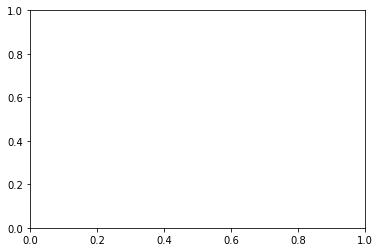

In [28]:
import sympy as sym
import math as math
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
'''def model(z,t):
  dq1dt=sym.diff(q1)
  dq2dt=sym.diff(q2)
  dzdt=sym.diff(d4)
  dq1ddt=r[0]
  dq2ddt=r[1]
  dzddt=r[2]
  dzdt=[dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dzdt

z0 = [0,0]
t=np.linspace(0,5)
z=odeint(model,z0,t)'''
l1=1
l2=1
l3=1
mG=1
E1=[]
E2=[]
E3=[]
T=[]
def Model(t, y):

    '''
    function for the ODE solver - returns dy/dt of states

    '''

    ini=np.array([1,1,1])
    f=np.array([3,3,3])
    tf=t
    ax0=ini[0]
    ay0=ini[1]
    az0=ini[2]
    ax1=0
    ay1=0
    az1=0

    #X=np.array([ax2,ax3,ay2,ay3,az2,az3])
    A=np.array([[tf**2,tf**3,0,0,0,0],[0,0,tf**2,tf**3,0,0],[0,0,0,0,tf**2,tf**3],[2*tf,3*tf**2,0,0,0,0],[0,0,2*tf,3*tf**2,0,0],[0,0,0,0,2*tf,3*tf**2]])
    K=np.array([f[0],f[1],f[2],0,0,0])
    if t==0:
      invA=A
    else:
      invA=np.linalg.inv(A)

 
    X=invA@K
    print(X);
    ax2=X[0]
    ax3=X[1]
    ay2=X[2]
    ay3=X[3]
    az2=X[4]
    az3=X[5]
    Aa=np.array([[ax0,ax1,ax2,ax3],[ay0,ay1,ay2,ay3],[az0,az1,az2,az3]])
    arr = np.array([[1,2,3],[4,5,6]])

#PATH calculator
    def pathfunc(tf,Aa,arr):
      
      m=0
      for m in range (round(tf+1)):
        T=np.array([1,m,m**2,m**3])

   
    
      row=Aa@T
      print(row)
      arr = np.vstack([arr,row])

      return arr

    arr = np.array([[0,0,0]])
    arr1 =pathfunc(tf,Aa,arr) #here we get all the points of trajectory


#inverse kinematics

    def invkine(arr1,J):

      for i in range(len(arr1)):

        x=[0]*3;
        x=arr1[i];
        d1=1;
        d2=3;
        d3=1;
        k=x[0]**2+x[1]**2
        r = abs((k+(x[2]-d1)**2-d2**2-d3**2)/(2*d2*d3))
        theta1 = np.arctan(x[1]/x[0])
        theta3 = np.arctan(np.sqrt(abs(1-r**2))/r)
        theta2 = np.arctan(x[1]/x[0]) - np.arctan((d3*np.sin(theta3))/(d2+d3*np.cos(theta3)))
    
        s=np.array([theta1,theta2,theta3])
        J=np.vstack([J,s])
      return J

    
    J=np.array([[0,0,0]])
    arr2=invkine(arr1,J) #here we get all the JOINT VAR of trajectory
    Q1=arr2[:,0]
    Q2=arr2[:,1]
    Q3=arr2[:,2]


    KP=0.5
    KI=0.5
    q1=y[0]
    q2=y[1]
    q3=y[2]
    q1dot=y[3]
    q2dot=y[4]
    q3dot=y[5]
    dq1dt=q1dot
    dq2dt=q2dot
    dq3dt=q3dot
    T.append(t)
   
    n=round(t)
    if(t<=n+1):
      e1=(Q1[n-1]-q1)
      e2=(Q2[n-1]-q2)
      e3=(Q3[n-1]-q3)
    else:
      n=n+1
      e1=(Q1[n]-q1)
      e2=(Q2[n]-q2)
      e3=(Q3[n]-d4)
   
    E1.append(e1)
    E2.append(e2)
    E3.append(e3)
    s1=0
    s2=0
    s3=0

    if(t>2):
        for i in range(7):
            s1=s1+ (E1[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
            s2=s2+ (E2[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
            s3=s3+ (E3[-(1+i)])*(T[-(1+i)]-T[-(2+i)])

    T1=KP*(e1)+KI*(s1)
    #print(T1)
    T2=KP*(e2)+KI*(s2)
    T3=KP*(e3)+KI*(s3)

    l1=1
    l2=1
    l3=1
    
    dq1ddt=(-T1 - 0.5*l3**2*q1dot**2*math.sin(2*q1) + 0.5*l3**2*q2dot*(q2dot + q3dot)*math.sin(2*q1) + 0.5*l3**2*q3dot*(q2dot + q3dot)*math.sin(2*q1))/(l3**2*math.cos(q1)**2 + 3)
    dq2ddt=(1/2)*(-(-l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2)*(2.0*T2 - 2.0*l1*math.cos(q2 + q3) + 4.0*l2*l3*q2dot*q3dot*math.cos(q3) + 2.0*l2*l3*q3dot**2*math.cos(q3) - 1.0*l2*math.cos(q2) - 2.0*l2*math.cos(q2 + q3) + 2.0*l3**2*q1dot*q2dot*math.sin(2*q1) + 2.0*l3**2*q1dot*q3dot*math.sin(2*q1) - 2.0*l3**2*q2dot*q3dot*math.sin(2*q3) - 2.0*l3**2*q3dot**2*math.sin(2*q3) - 1.0*l3*math.cos(q2 + q3)) + (2*T3 + l3**2*q1dot*(q2dot + q3dot)*math.sin(2*q1) + l3**2*q3dot*(q1dot*math.sin(2*q1) - q3dot*math.sin(2*q3)) + l3*q2dot*(l3*q1dot*math.sin(2*q1) - 2*q2dot*(l2 - l3*math.sin(q3))*math.cos(q3)) - (2*l1 + 2*l2 + l3)*math.cos(q2 + q3))*(-l2*l3*math.sin(q3) - l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2))/(l2**2*(l3**2*math.cos(q1)**2 + 2))
    dq3ddt= (1/2)*(-(2*T3 + l3**2*q1dot*(q2dot + q3dot)*math.sin(2*q1) + l3**2*q3dot*(q1dot*math.sin(2*q1) - q3dot*math.sin(2*q3)) + l3*q2dot*(l3*q1dot*math.sin(2*q1) - 2*q2dot*(l2 - l3*math.sin(q3))*math.cos(q3)) - (2*l1 + 2*l2 + l3)*math.cos(q2 + q3))*(l2**2 - 2*l2*l3*math.sin(q3) - l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2) + (-l2*l3*math.sin(q3) - l3**2*math.sin(q1)**2 + l3**2*math.sin(q3)**2 + l3**2 + 2)*(2.0*T2 - 2.0*l1*math.cos(q2 + q3) + 4.0*l2*l3*q2dot*q3dot*math.cos(q3) + 2.0*l2*l3*q3dot**2*math.cos(q3) - 1.0*l2*math.cos(q2) - 2.0*l2*math.cos(q2 + q3) + 2.0*l3**2*q1dot*q2dot*math.sin(2*q1) + 2.0*l3**2*q1dot*q3dot*math.sin(2*q1) - 2.0*l3**2*q2dot*q3dot*math.sin(2*q3) - 2.0*l3**2*q3dot**2*math.sin(2*q3) - 1.0*l3*math.cos(q2 + q3)))/(l2**2*(l3**2*math.cos(q1)**2 + 2))
    dydt = [dq1dt,dq2dt,dq3dt,dq1ddt,dq2ddt,dq3ddt]
    return dydt



initstate = [0,0,0,0,0,0] # initial states
timestep = 0.1

time = np.linspace(0,7, 7) # define the time for which we want to solve


# solve the ODE. solve_ivp is the most recent version of the solver. Check docs for more information on how to use.
solution = solve_ivp(Model, [0, time[-1]], initstate, t_eval= time) 
Q1n=solution.y[0]
Q2n=solution.y[1]
Q3n=solution.y[2]
Q1DOT=solution.y[3]
Q2DOT=solution.y[4]
Q3DOT=solution.y[5]
